In [1]:
from models import DiscriminatorNetwork, GeneratorNetwork
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator_state_dict = "./checkpoint/generator_end.pt"
generator = GeneratorNetwork().to(device)
generator.load_state_dict(torch.load(generator_state_dict))

<All keys matched successfully>

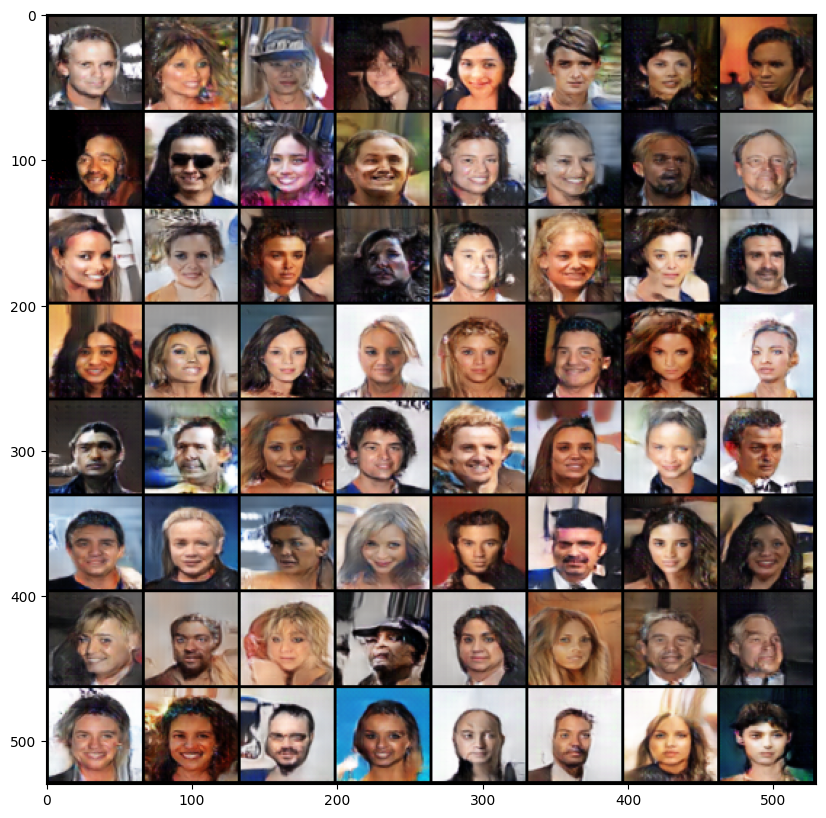

In [12]:
noise = torch.randn(size=(64, 100, 1, 1)).to(device)
with torch.no_grad():
    images = generator(noise)
images_plot = make_grid(images.cpu(), padding=2, normalize=True)
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(images_plot, (1, 2, 0)))